# Visualize Concrete Strength
A review of methods for data visualization and exploration, using [concrete mixture data](https://www.kaggle.com/maajdl/yeh-concret-data).

```python
url = 'http://apmonitor.com/pds/uploads/Main/cement_strength.txt'
```

![Concrete Strength](https://apmonitor.com/pds/uploads/Main/concrete_strength_visualization.png)

Concrete strength is affected by factors such as water to cement ratio, raw material quality, the ratio of coarse or fine aggregate, concrete age, concrete compaction, temperature, relative humidity, and other factors during the curing of the concrete. The data includes the following information for 1030 concrete samples.

- **Input variables:**
  - Cement: kg/m$^3$ mixture
  - Blast Furnace Slag: kg/m$^3$ mixture
  - Fly Ash: kg/m$^3$ mixture
  - Water: kg/m$^3$ mixture
  - Superplasticizer: kg/m$^3$ mixture
  - Coarse Aggregate: kg/m$^3$ mixture
  - Fine Aggregate: kg/m$^3$ mixture
  - Age: Day (1~365)
- **Output variable:**
  - Concrete compressive strength: MPa
  
See [Case Study on Concrete Strength](https://apmonitor.com/pds/index.php/Main/CementStrength) for additional description and source code.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


In [4]:
# Import data and display first 20 rows
df = pd.read_csv('http://apmonitor.com/pds/uploads/Main/cement_strength.txt')
df.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 1-D plots
1-dimensional plots are useful for plotting distributions of a single feature. It enables quick observations to see if the data is clean or if it needs some preprocessing. There are many ways to visualize the distribution, several of which are shown below:

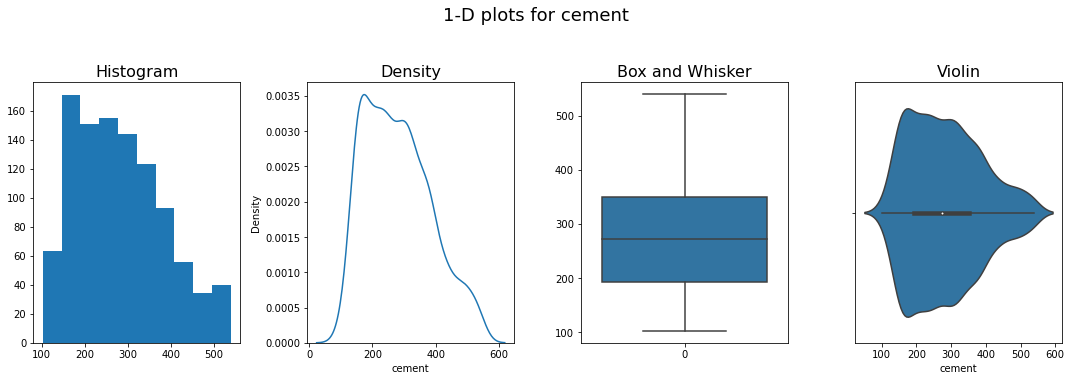

In [5]:
col = 'cement'

plt.figure(figsize=(15,5))
plt.suptitle('1-D plots for %s' %col,size=18,y=1.05)

plt.subplot(141)
plt.hist(df[col])
plt.title('Histogram',size=16)

plt.subplot(142)
sns.kdeplot(data = df[col])
plt.title('Density',size=16)

plt.subplot(143)
sns.boxplot(data = df[col])
plt.title('Box and Whisker',size=16)

plt.subplot(144)
sns.violinplot(x = df[col])
plt.title('Violin',size=16)

plt.tight_layout()

**Activity:** Create a series of 1-dimensional plots to visualize the distribution of concrete strength `csMPa` in MPa.

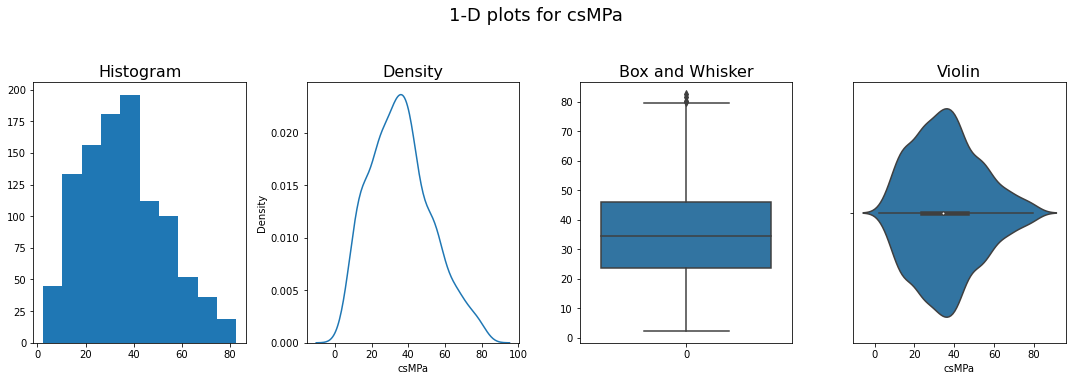

In [6]:
col = 'csMPa'

plt.figure(figsize=(15,5))
plt.suptitle('1-D plots for %s' %col,size=18,y=1.05)

plt.subplot(141)
plt.hist(df[col])
plt.title('Histogram',size=16)

plt.subplot(142)
sns.kdeplot(data = df[col])
plt.title('Density',size=16)

plt.subplot(143)
sns.boxplot(data = df[col])
plt.title('Box and Whisker',size=16)

plt.subplot(144)
sns.violinplot(x = df[col])
plt.title('Violin',size=16)

plt.tight_layout()

# 2-D plots
2-dimensional plots are particularly useful to show correlations between two features. This could be useful to give you an idea of important features to predict an output with a machine learning model. 

- **Line plots:** shows time series; since there is no time element in this dataset, this will not be shown here. To create a line plot, use plt.plot(data)
- **Scatter plots:** shows correlations between two features. Consider log scales for data that spans several orders of magnitude
- **Pairplots and jointplots:** seaborn plots that show both the distribution and correlations
- **Heatmap:** compute correlations between features using Pandas df.corr(). Highly correlated features are often redundant and slow down the analysis without improving results
- **Grouped 1-D plots:** distributions of a single column of data that are grouped based on an independent feature

Text(0, 0.5, 'Compressive Strength (MPa)')

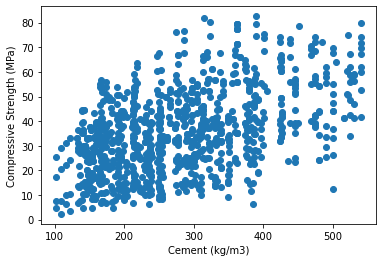

In [7]:
# Scatter plot
x = df['cement']
y = df['csMPa']

plt.scatter(x,y)
plt.xlabel('Cement (kg/m3)')
plt.ylabel('Compressive Strength (MPa)')

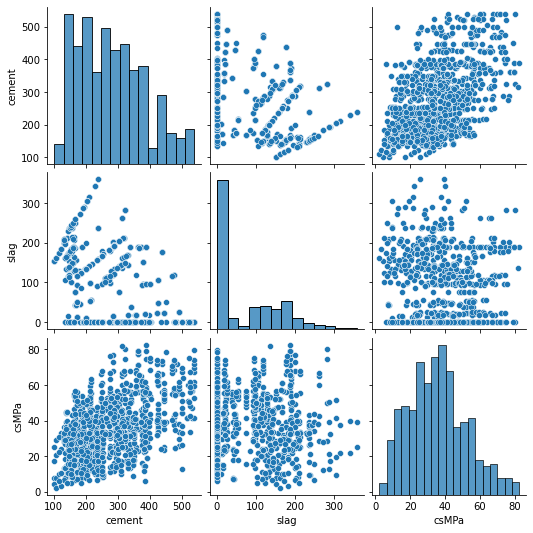

In [8]:
# Pairplot
sns.pairplot(df[['cement','slag','csMPa']])

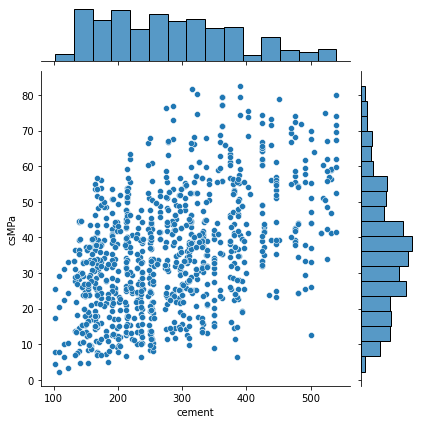

In [9]:
# Jointplot
sns.jointplot(x=df['cement'],y=df['csMPa'])

<AxesSubplot:>

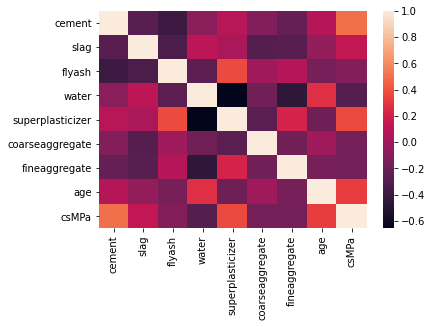

In [10]:
# Heatmap showing the correlation between features
# 1.0 means exactly correlated, -1.0 means exactly inversely correlated, and 0.0 means no correlation
sns.heatmap(df.corr())

In [13]:
# Grouped 1-D plot
# Group 'cement' based on csMPa > 35.0 or not
df['Strength'] = np.where(df['csMPa'] > 35.0,'Hi','Lo')
df.head(20)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,Hi
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,Hi
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,Hi
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,Hi
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,Hi
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03,Hi
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70,Hi
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45,Hi
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,Hi
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29,Hi


<AxesSubplot:xlabel='Strength', ylabel='cement'>

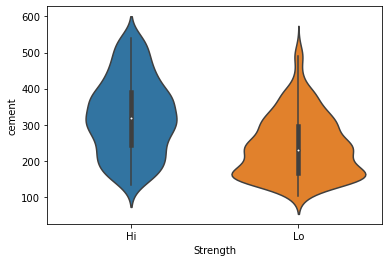

In [14]:
sns.violinplot(x = df['Strength'],y = df['cement'])

**Activity** Generate 2 types of 2-dimensional plots using 2 features of your choice (csMPa would be a useful feature to include, since that is the output feature you want to predict with regression)

In [16]:
for x in df.columns:
    print(x)

cement
slag
flyash
water
superplasticizer
coarseaggregate
fineaggregate
age
csMPa
Strength


<AxesSubplot:xlabel='Strength', ylabel='slag'>

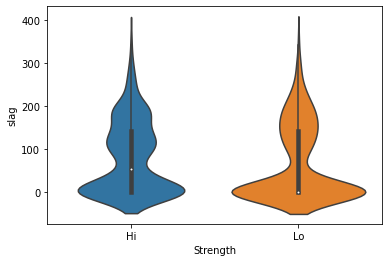

In [18]:
sns.violinplot(x = df['Strength'],y = df['slag'])

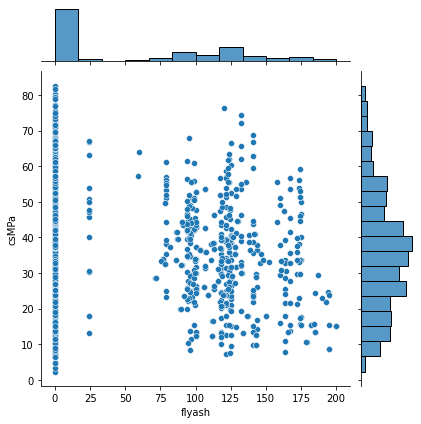

In [19]:
sns.jointplot(x=df['flyash'],y=df['csMPa'])

# Multi-dimensional plots
Multidimensional plots visualize more complex relationships. However, natural intuition begins to break down as more dimensions are introduced, so be careful when introducing too many features in a single plot. 

- 3-D scatter plots show correlations between 3 features. However, visualizing the 3-D plot on a 2-D screen can present challenges. See the "Other plotting options" section for alternatives
- Grouping methods can continue to show more features on a 2-D plot by adjusting the color, size, or shape of the marker; be sure to include a legend
- Principal Component Analysis (PCA) reduces dozens of features by tranforming to a lower dimensional space. The principal component directions and magnitudes are computed using the PCA function from scikit-learn. 

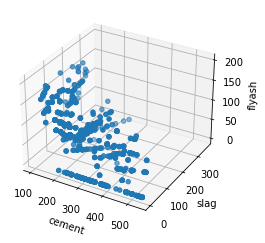

In [20]:
# 3-D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['cement']
y = df['slag']
z = df['flyash']

ax.set_xlabel('cement')
ax.set_ylabel('slag')
ax.set_zlabel('flyash')

ax.scatter(x, y, z)

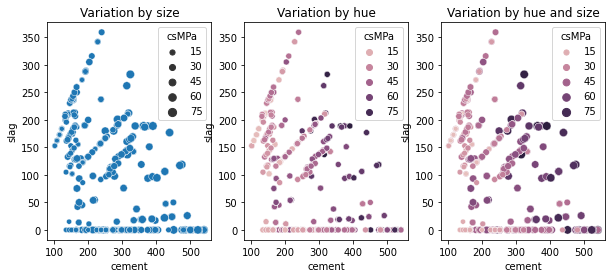

In [22]:
# Grouping method: show 'cement' and 'slag' as primary correlation,
#  with csMPa as the variation in marker
x = df['cement']
y = df['slag']
z = df['csMPa']

plt.figure(figsize=(10,4))
plt.subplot(131)
sns.scatterplot(x = x,y = y,size=z)
plt.title('Variation by size')

plt.subplot(132)
sns.scatterplot(x = x,y = y,hue=z)
plt.title('Variation by hue')

plt.subplot(133)
sns.scatterplot(x = x,y = y,hue=z,size=z)
plt.title('Variation by hue and size')

plt.show()

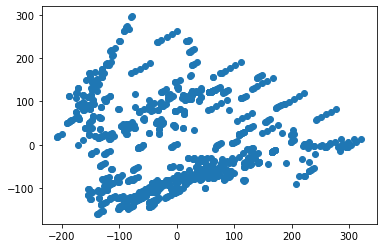

In [23]:
# PCA
pca = PCA(n_components=2)
pca_data = df[df.columns[:-2]].values
principal_components = pca.fit_transform(pca_data)

x = principal_components[:,0]
y = principal_components[:,1]
plt.scatter(x,y)
plt.show()

**Activity:** Create a multidimensional plot of at least 3 features and plot them. 

**Bonus Activity:** Perform a PCA using only 2 features. Plot the results of the PCA, and a scatterplot of the raw data. Are they different? If so, how and why?

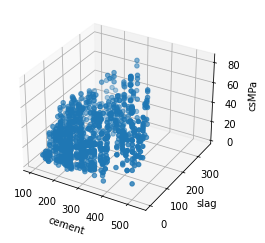

In [24]:
# 3-D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['cement']
y = df['slag']
z = df['csMPa']

ax.set_xlabel('cement')
ax.set_ylabel('slag')
ax.set_zlabel('csMPa')

ax.scatter(x, y, z)

flyash
water


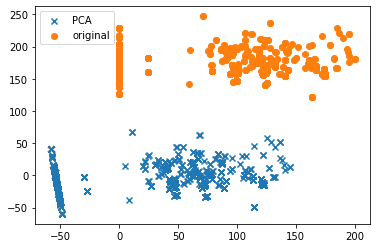

In [31]:
# PCA
pca = PCA(n_components=2)
pca_data = df[df.columns[2:4]].values
principal_components = pca.fit_transform(pca_data)

x = principal_components[:,0]
y = principal_components[:,1]
plt.scatter(x,y,marker='x',label='PCA')
plt.scatter(df[df.columns[2]],df[df.columns[3]],label='original')
print(df.columns[2])
print(df.columns[3])
plt.legend()
plt.show()

# Other plotting options

- Plotly creates interactive plots for exploring data results. While the syntax makes it slightly harder to get quick results for data exploration, it creates a much more intuitive interface to explore and present the data. It is particularly useful for exploring 3-D scatter plots
- Pandas Profiling quickly generates plots of distributions, correlations, and other useful visualizations with just one line of code. If you are presented with a new dataset, this is a great option to get started exploring

In [33]:
# Plotly interactive 3-D plot
x = df['cement']
y = df['slag']
z = df['flyash']

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers')])

fig.update_layout(scene = dict(
                    xaxis_title='cement',
                    yaxis_title='slag',
                    zaxis_title='csMPa'))

fig.show()